In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('amazon.csv',encoding='iso-8859-1',parse_dates=['date'])

In [9]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [10]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [11]:
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [12]:
df.shape

(6454, 5)

In [13]:
df.shape[0]

6454

In [19]:
dup_data=df.duplicated().any()

In [20]:
dup_data

True

In [21]:
df.drop_duplicates()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [23]:
df.isnull()

,year,state,month,number,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6449,False,False,False,False,False
6450,False,False,False,False,False
6451,False,False,False,False,False
6452,False,False,False,False,False


In [24]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [25]:
df.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Janeiro,NaN,NaN
freq,NaN,717,541,NaN,NaN
mean,2007.461729,NaN,NaN,108.293163,2007-06-18 18:28:53.622559488
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2002.000000,NaN,NaN,3.000000,2002-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.000000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,113.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [26]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [28]:
df['month_new']=df['month'].map({'Janeiro':'jan',
                                    'Fevereiro':'feb',
                                    'Março':'march',
                                    'Abril':'april',
                                    'Maio':'may',
                                    'Junho':'jun',
                                    'Julho':'july',
                                    'Agosto':'august',
                                    'Setembro':'sep',
                                    'Outubro':'oct',
                                    'Novembro':'nov',
                                    'Dezembro':'dec'
                                   })

In [29]:
df.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [30]:
df.shape

(6454, 6)

In [31]:
df.groupby('month_new')['number'].sum()

month_new
april     28188.770
august    88050.435
dec       57535.480
feb       30848.050
jan       47747.844
july      92326.113
jun       56010.675
march     30717.405
may       34731.363
nov       85508.054
oct       88681.579
sep       58578.305
Name: number, dtype: float64

In [32]:
df.groupby('month_new')['number'].sum().sort_values(ascending=False)

month_new
july      92326.113
oct       88681.579
august    88050.435
nov       85508.054
sep       58578.305
dec       57535.480
jun       56010.675
jan       47747.844
may       34731.363
feb       30848.050
march     30717.405
april     28188.770
Name: number, dtype: float64

<Axes: xlabel='month_new', ylabel='number'>

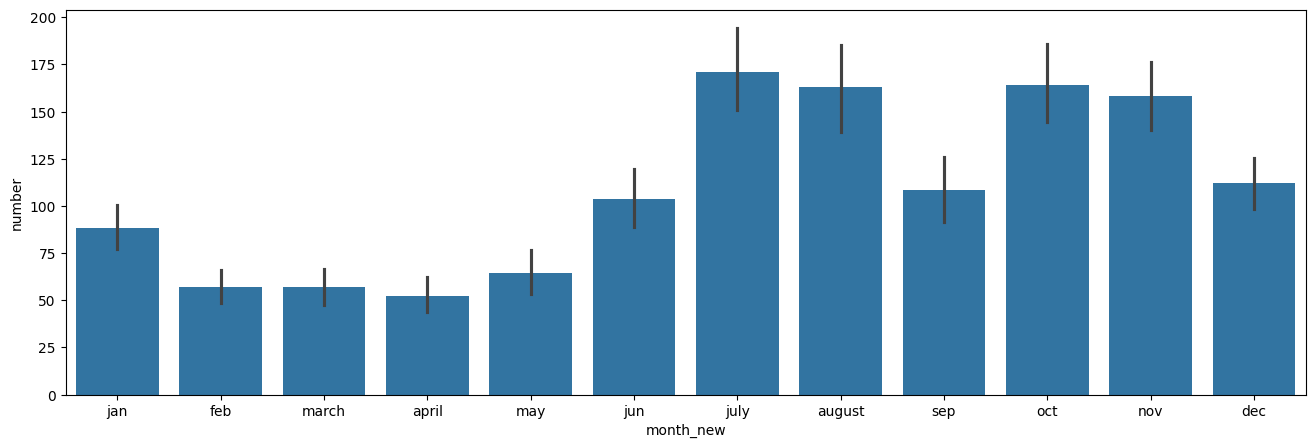

In [35]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data=df)

In [41]:
df.groupby('year')['number'].max().sort_values(ascending=False)
#df.groupby('year')['number'].max().reset_index()


year
2008    998.0
2006    995.0
2012    995.0
2009    989.0
2017    987.0
2007    982.0
1999    982.0
2001    979.0
2003    977.0
2002    976.0
2011    974.0
2016    969.0
2004    960.0
2015    960.0
2013    956.0
2014    952.0
2005    948.0
2010    941.0
2000    925.0
1998    875.0
Name: number, dtype: float64

<Axes: xlabel='year', ylabel='number'>

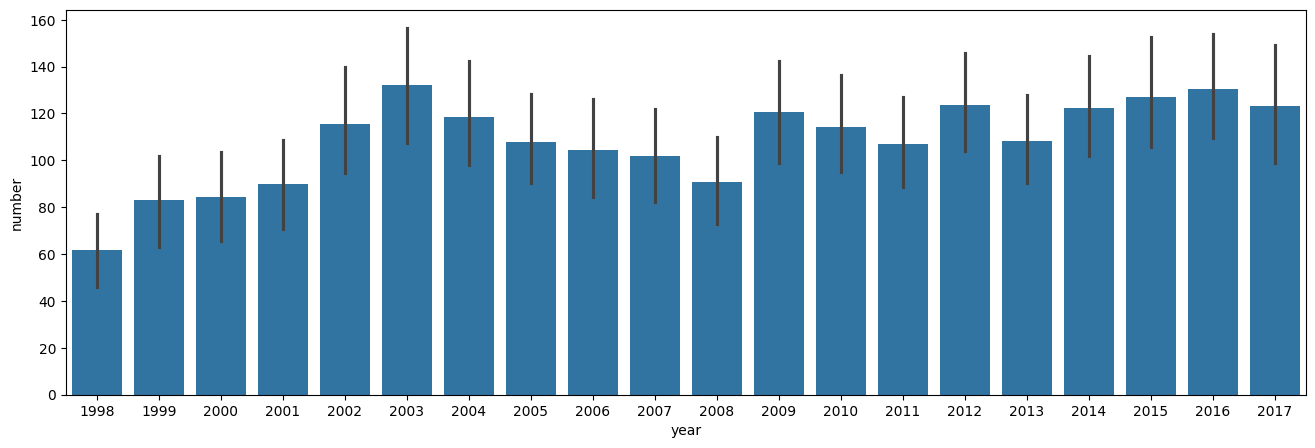

In [42]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=df)

In [43]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [45]:
df.groupby('state')['number'].max().sort_values(ascending=False)

state
Amazonas            998.0
Bahia               995.0
Ceara               995.0
Tocantins           989.0
Paraiba             987.0
Pará                982.0
Sao Paulo           981.0
Mato Grosso         979.0
Maranhao            972.0
Amapa               969.0
Rondonia            969.0
Acre                960.0
Minas Gerais        959.0
Goias               943.0
Piau                943.0
Rio                 885.0
Pernambuco          859.0
Roraima             820.0
Santa Catarina      765.0
Espirito Santo      307.0
Sergipe             198.0
Distrito Federal    196.0
Alagoas             162.0
Name: number, dtype: float64

<Axes: xlabel='state', ylabel='number'>

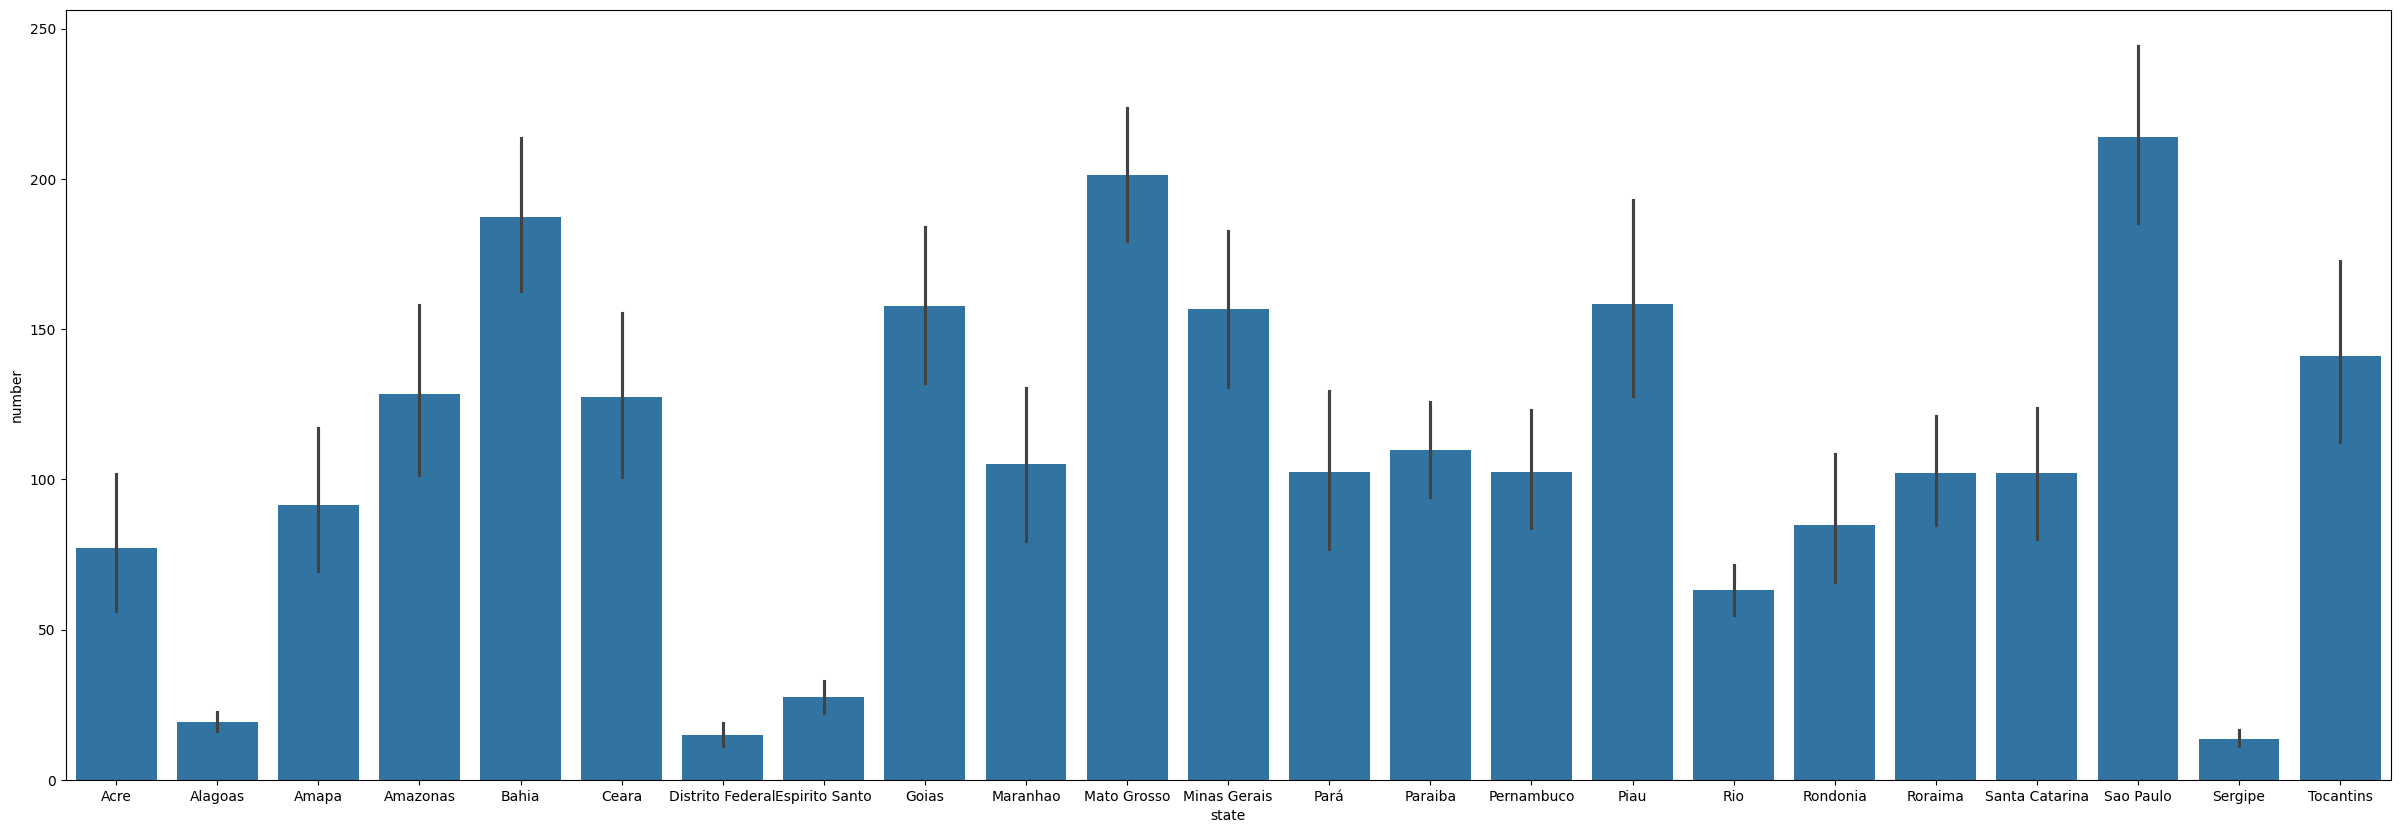

In [50]:
plt.figure(figsize=(30,10))
sns.barplot(x='state',y='number',data=df)

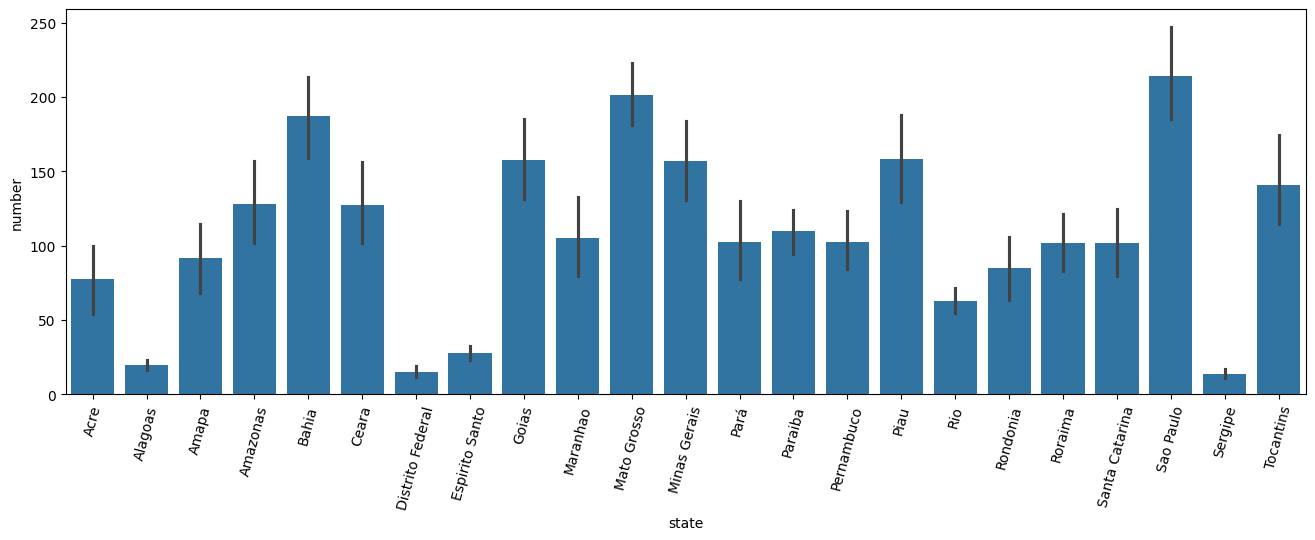

In [51]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=df)
plt.xticks(rotation=75)
plt.show()

In [53]:
df[df['state']=='Amazonas']

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


In [54]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

In [57]:
data=df[df['state']=='Amazonas'].groupby('year')['number'].sum().reset_index()

<Axes: xlabel='year', ylabel='number'>

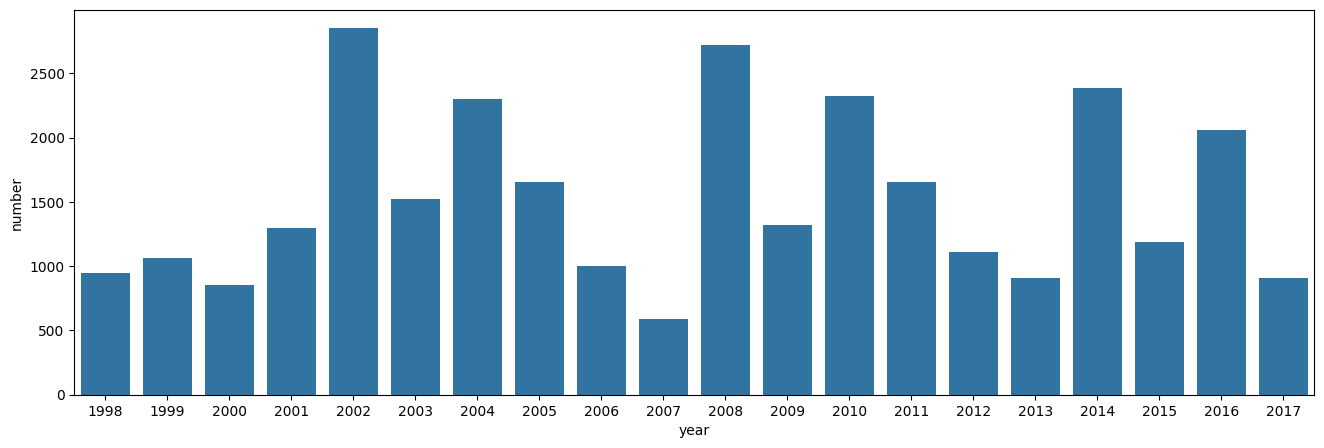

In [60]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data)

In [61]:
data1=df[df['state']=='Amazonas']
data1

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


In [73]:
day=data1.groupby(data1['date'].dt.dayofweek).sum().number
#24:41

TypeError: datetime64 type does not support sum operations

In [71]:
import calendar
day=[calendar.day_name[x] for x in range(0,7)]
day

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [74]:
plt.figure(figsize=(16,5))
sns.barplot(x='index',y='number',data=day)

TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

<Figure size 1600x500 with 0 Axes>

In [75]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [79]:
fire=df[df['year']==2015].groupby('month_new')['number'].sum()

In [82]:
#fire.sort_values(ascending=False)

month_new
jan       4635.000
oct       4499.525
july      4364.392
august    4363.125
dec       4088.522
nov       4034.518
jun       3260.552
april     2573.000
sep       2494.658
may       2384.000
feb       2309.000
march     2202.000
Name: number, dtype: float64

In [ ]:
fire.reset

In [83]:
sns.barplot(x='month_new',y='number',data=fire)

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.